In [541]:
import numpy as np
from random import randrange
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [551]:
def keccak(text):
    from Crypto.Hash import keccak
    k = keccak.new(digest_bits=256)
    k.update(text.encode("utf8"))
    return k.hexdigest()

def spiltHash(hash):
    spilted = []
    for s in hash:
        spilted.append(ord(s))
    
    return spilted

def fMod(x,m):
    # return math.sqrt(x)
    return x%m

def spiltedMod(spilted,mod):
    return np.array([fMod(x,mod) for x in spilted])

def countDup(moded):
    count = 0
#     check = moded[0]
    check = 0
    for i in moded:
        if(i == check):
            count = count+1
        else:
            break
    return count

def countDupMulti(moded):
    count = np.zeros(6)
    stopper = np.zeros(6)
#     check = moded[0]
    toggleCheck = 0
    index = 0
    for i in moded:
        #longest 0 from start
        if(i == 0 and stopper[0] ==0):
            count[0] = count[0]+1
        else:
            stopper[0] = 1
        
        
        #longest 1 from start
        if(i == 1 and stopper[1] ==0):
            count[1] = count[1]+1
        else:
            stopper[1] = 1
            
        if(index >= 31):
            #longest 0 from index 31
            if(i == 0 and stopper[2] ==0):
                count[2] = count[2]+1
            else:
                stopper[2] = 1

            #longest 1 from index 31
            if(i == 1 and stopper[3] ==0):
                count[3] = count[3]+1
            else:
                stopper[3] = 1
            
        #longest 0 1 toggle
        if(i == toggleCheck and stopper[4] ==0):
            count[4] = count[4]+1
            if(toggleCheck == 1):
                toggleCheck = 0
            else:
                toggleCheck = 1
        else:
            stopper[4] = 1
            
        index = index +1
    return count

def plotHistogram(data,name):
    fig, ax = plt.subplots()
    unique, counts = np.unique(data, return_counts=True)
    # the histogram of the data
    n, bins, patches = ax.hist(data, unique.size, density=1)

    ax.set_xlabel('Unique')
    ax.set_ylabel('Probability density')
    ax.set_title(r'Histogram of duplicate in '+name)
    plt.xticks(unique)
    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()
    
def plotHistogramLog(data,name):
    fig, ax = plt.subplots()
    unique, counts = np.unique(data, return_counts=True)
    # the histogram of the data
    n, bins, patches = ax.hist(data, unique.size, log=1)

    ax.set_xlabel('Unique')
    ax.set_ylabel('Log scale')
    ax.set_title(r'Histogram of duplicate in '+name)
    plt.xticks(unique)
    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

In [543]:
initTimestamp= 1634100587
timestampStep= 10
randDiff = 10
row = 100000
genArray = []
result = []
spiltedModArray = []
for i in range(0,row):
    newtime = (i*timestampStep)+initTimestamp+(randrange(randDiff+1))
    genArray.append(newtime)
    tmp = spiltedMod(spiltHash(keccak(str(newtime))),2)
    spiltedModArray.append(''.join(map(str, tmp)))
    result.append(countDupMulti(tmp))
timeArray = np.array(genArray)


In [544]:
data = np.array(result)
df = pd.DataFrame(data=data)
df["Sum luck"] = df.loc[:,0:5].sum(axis=1)
df["Moded"] = spiltedModArray
df

0    1    2    3    4    5  Sum luck  \
0      0.0  1.0  0.0  5.0  0.0  0.0       6.0   
1      0.0  1.0  0.0  5.0  0.0  0.0       6.0   
2      7.0  0.0  1.0  0.0  1.0  0.0       9.0   
3      2.0  0.0  0.0  3.0  1.0  0.0       6.0   
4      2.0  0.0  2.0  0.0  1.0  0.0       5.0   
...    ...  ...  ...  ...  ...  ...       ...   
99995  0.0  1.0  0.0  1.0  0.0  0.0       2.0   
99996  0.0  1.0  2.0  0.0  0.0  0.0       3.0   
99997  1.0  0.0  0.0  4.0  2.0  0.0       7.0   
99998  0.0  2.0  0.0  2.0  0.0  0.0       4.0   
99999  0.0  2.0  2.0  0.0  0.0  0.0       4.0   

                                                   Moded  
0      1010100110111111100001101110100111110101111101...  
1      1010100110111111100001101110100111110101111101...  
2      0000000100010001100110010011000010001010001101...  
3      0011100011000101110111111100101111010110100100...  
4      0010010010111010011100110100001001110011001100...  
...                                                  ...  
99995  1001011000110101000101111101001100110101100101...  
99996  1011111110001010011010010001100001111010111100...  
99997  0111100101100110001110011001011111101101000001...  
99998  1100101010101010001101101101001110100101110001...  
99999  1101000110111110001010100001100001111101111011...  

[100000 rows x 8 columns]

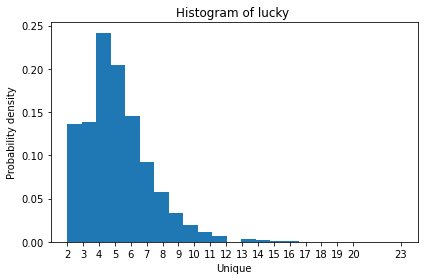

In [557]:
fig, ax = plt.subplots()
uniqueL, countsL = np.unique(df["Sum luck"], return_counts=True)
# the histogram of the data
n, bins, patches = ax.hist(df["Sum luck"], int(max(uniqueL)), density=1)

ax.set_xlabel('Unique')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of lucky ')
plt.xticks(uniqueL)
# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [560]:
d = {'Luck': uniqueL,'P(Luck)':countsL/row ,'count':countsL}
dfL = pd.DataFrame(data=d)
dfL

Luck  P(Luck)  count
0    2.0  0.12482  12482
1    3.0  0.12703  12703
2    4.0  0.22071  22071
3    5.0  0.18675  18675
4    6.0  0.13245  13245
5    7.0  0.08460   8460
6    8.0  0.05243   5243
7    9.0  0.03050   3050
8   10.0  0.01809   1809
9   11.0  0.01009   1009
10  12.0  0.00566    566
11  13.0  0.00322    322
12  14.0  0.00163    163
13  15.0  0.00084     84
14  16.0  0.00055     55
15  17.0  0.00022     22
16  18.0  0.00020     20
17  19.0  0.00014     14
18  20.0  0.00005      5
19  23.0  0.00002      2

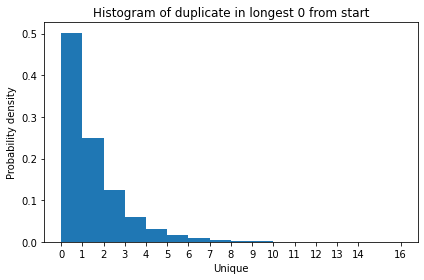

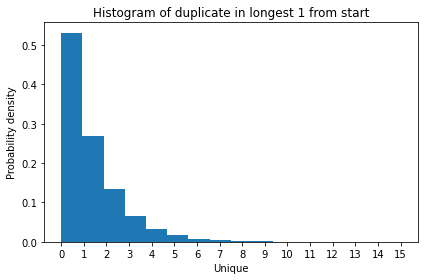

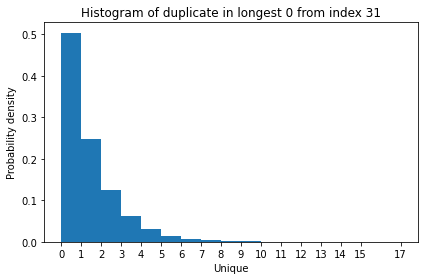

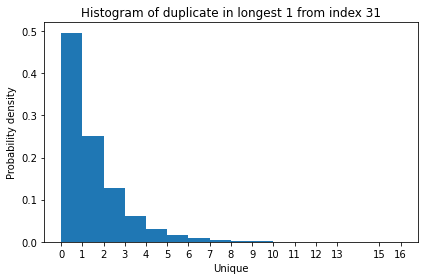

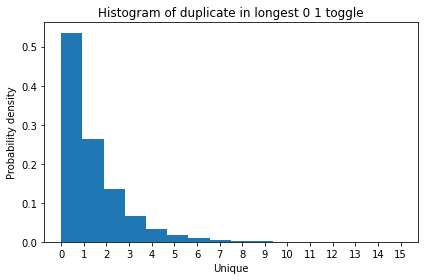

In [554]:
plotHistogram(df[0],"longest 0 from start")
plotHistogram(df[1],"longest 1 from start")
plotHistogram(df[2],"longest 0 from index 31")
plotHistogram(df[3],"longest 1 from index 31")
plotHistogram(df[4],"longest 0 1 toggle")

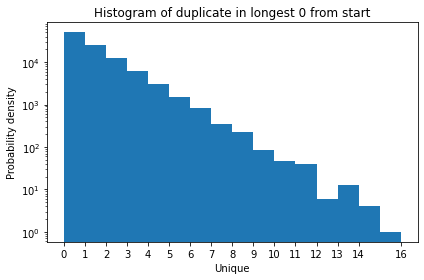

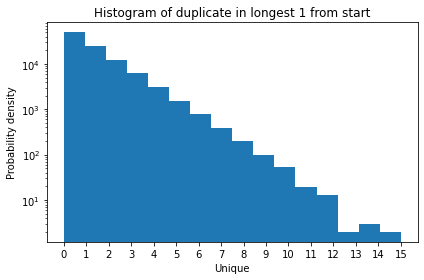

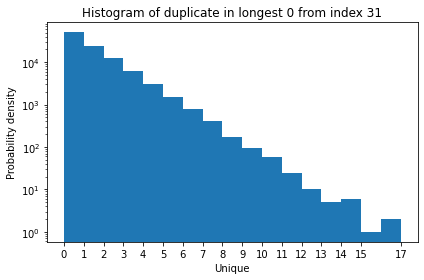

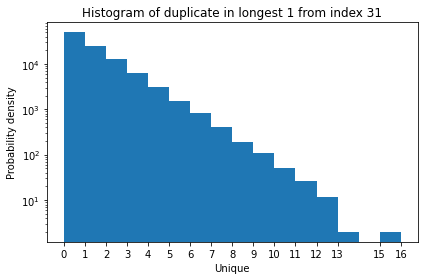

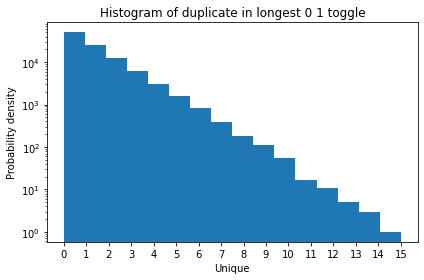

In [548]:
plotHistogramLog(df[0],"longest 0 from start")
plotHistogramLog(df[1],"longest 1 from start")
plotHistogramLog(df[2],"longest 0 from index 31")
plotHistogramLog(df[3],"longest 1 from index 31")
plotHistogramLog(df[4],"longest 0 1 toggle")

In [549]:
p = np.zeros((5, 20, 1))
d = {'X': range(0,20)}
dfP = pd.DataFrame(data=d)
for i in range(0,5):
    unique, counts = np.unique(df[i], return_counts=True)
    for j in range(0,unique.size):
        p[i,int(unique[j]),0] = counts[j]
    dfP['P(X,'+ str(i) +')'] = (p[i].transpose())[0]/row
    dfP['Count('+ str(i) +')'] = (p[i].transpose())[0]


In [550]:
dfP

X   P(X,0)  Count(0)   P(X,1)  Count(1)   P(X,2)  Count(2)   P(X,3)  \
0    0  0.50198   50198.0  0.49802   49802.0  0.50377   50377.0  0.49623   
1    1  0.24999   24999.0  0.25260   25260.0  0.24675   24675.0  0.25197   
2    2  0.12548   12548.0  0.12549   12549.0  0.12569   12569.0  0.12754   
3    3  0.06043    6043.0  0.06264    6264.0  0.06256    6256.0  0.06225   
4    4  0.03070    3070.0  0.03042    3042.0  0.03092    3092.0  0.03073   
5    5  0.01534    1534.0  0.01539    1539.0  0.01474    1474.0  0.01518   
6    6  0.00837     837.0  0.00773     773.0  0.00782     782.0  0.00811   
7    7  0.00353     353.0  0.00381     381.0  0.00402     402.0  0.00403   
8    8  0.00221     221.0  0.00200     200.0  0.00171     171.0  0.00195   
9    9  0.00086      86.0  0.00098      98.0  0.00096      96.0  0.00108   
10  10  0.00047      47.0  0.00053      53.0  0.00058      58.0  0.00051   
11  11  0.00040      40.0  0.00019      19.0  0.00024      24.0  0.00026   
12  12  0.00006       6.0  0.00013      13.0  0.00010      10.0  0.00012   
13  13  0.00013      13.0  0.00002       2.0  0.00005       5.0  0.00002   
14  14  0.00004       4.0  0.00003       3.0  0.00006       6.0  0.00000   
15  15  0.00000       0.0  0.00002       2.0  0.00001       1.0  0.00001   
16  16  0.00001       1.0  0.00000       0.0  0.00000       0.0  0.00001   
17  17  0.00000       0.0  0.00000       0.0  0.00002       2.0  0.00000   
18  18  0.00000       0.0  0.00000       0.0  0.00000       0.0  0.00000   
19  19  0.00000       0.0  0.00000       0.0  0.00000       0.0  0.00000   

    Count(3)   P(X,4)  Count(4)  
0    49623.0  0.50198   50198.0  
1    25197.0  0.24803   24803.0  
2    12754.0  0.12613   12613.0  
3     6225.0  0.06192    6192.0  
4     3073.0  0.03051    3051.0  
5     1518.0  0.01559    1559.0  
6      811.0  0.00816     816.0  
7      403.0  0.00381     381.0  
8      195.0  0.00185     185.0  
9      108.0  0.00109     109.0  
10      51.0  0.00056      56.0  
11      26.0  0.00017      17.0  
12      12.0  0.00011      11.0  
13       2.0  0.00005       5.0  
14       0.0  0.00003       3.0  
15       1.0  0.00001       1.0  
16       1.0  0.00000       0.0  
17       0.0  0.00000       0.0  
18       0.0  0.00000       0.0  
19       0.0  0.00000       0.0